In [75]:
import os
import numpy as np
import scipy as sp
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [90]:
#bmag = pd.read_csv('/Users/Astrophysics/data/B.csv')

# data in apparent magnitudes m
data = pd.read_csv('M12_V.csv')
print(data[:2])

# Isochrones/models in absolute magnitudes M
iso1 = pd.read_csv('t2.5e8.csv')
iso2 = pd.read_csv('t7.5e8.csv')
iso3 = pd.read_csv('t1e9.csv')

   Number  ApertureRA  ApertureDec  CentroidRA  CentroidDec  ApertureX  \
0       1  251.803662    -1.953681  251.803621    -1.953633        225   
1       2  251.799170    -1.953682  251.799148    -1.953657        306   

   ApertureY  CentroidX  CentroidY  CentroidFlag  SourceIntensityB  \
0         12    225.740     12.872             1           4048.45   
1         12    306.405     12.439             1           1692.64   

   SourceIntensityV  ApertureCorr  SourceUncertainty DataUnits  Magnitude  \
0          16301.10             1            417.742      D.N.   -10.5305   
1           8048.89             1            211.281      D.N.    -9.7643   

   MagUncertainty  SourceModel SkyModel  SkyMedian    SkyMode  SkyAverage  \
0          0.0278            2        B  43.647095  22.503784   59.942854   
1          0.0285            2        B  27.605402  20.153803   39.717787   

   SkyLocalNonAnnulusBkg     SkyRMS  SkyCustom   SkySigma   SkyScale  \
0              29.902069  75.3

In [91]:
def mag(mags=0, flux=0, fluxs=0):
    return mags-2.5*np.log10(flux/fluxs)

In [92]:
requestedindex = data.iloc[3022] # x = 157 y = 1142 from slides
b_standed = 15.53 # from slides
v_standed = 15.40 # from slides
b_standared_flux = data.iloc[3022]['SourceIntensityB']
v_standed_flux = data.iloc[3022]['SourceIntensityV']

b_fluxes = data['SourceIntensityB']
v_fluxes = data['SourceIntensityV']

# Calculate the absolute magnitude of the star
b_mag = np.array([mag(mags=b_standed, flux=flux, fluxs=b_standared_flux) for flux in b_fluxes])
v_mag = np.array([mag(mags=v_standed, flux=flux, fluxs=v_standed_flux) for flux in v_fluxes])

/var/folders/4f/dj3ccsfj7n96_pqqw9zrw7mr0000gn/T/ipykernel_12014/2535742495.py:2: RuntimeWarning: invalid value encountered in log10
  return mags-2.5*np.log10(flux/fluxs)


(16.0, 4.0)

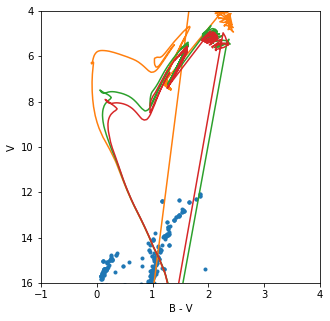

In [93]:
# Distance modulus mu = m - M
# mu = 6.
mu = 7.5

plt.figure(figsize=(5, 5))

# plot data
# plt.plot(data['B1mag']-data['V1mag'], data['V1mag'], '.')
plt.plot(b_mag-v_mag, v_mag, '.', label='data')

# plot models
plt.plot(iso1['Bmag']-iso1['Vmag'], iso1['Vmag']+mu)
plt.plot(iso2['Bmag']-iso2['Vmag'], iso2['Vmag']+mu)
plt.plot(iso3['Bmag']-iso3['Vmag'], iso3['Vmag']+mu)

plt.xlabel('B - V')
plt.ylabel('V')
plt.xlim(-1, 4)
plt.ylim(16, 4)

In [94]:
print('Distance to M44 cluster:', round(10**(mu/5+1),1), 'pc')

Distance to M44 cluster: 316.2 pc
